<a href="https://colab.research.google.com/github/Fathima015/Task-8/blob/main/Task-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
uploaded = files.upload()
df=pd.read_csv(next(iter(uploaded)))
df.head()

Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Pairwise Scatterplot**

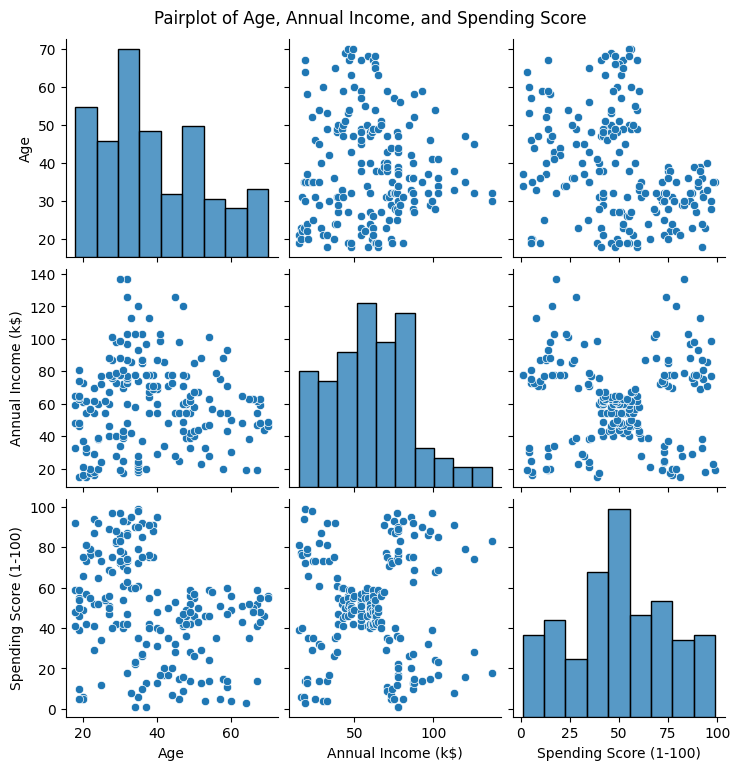

In [7]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Age, Annual Income, and Spending Score", y=1.02)
plt.show()

# **PCA for 2D Visualization**

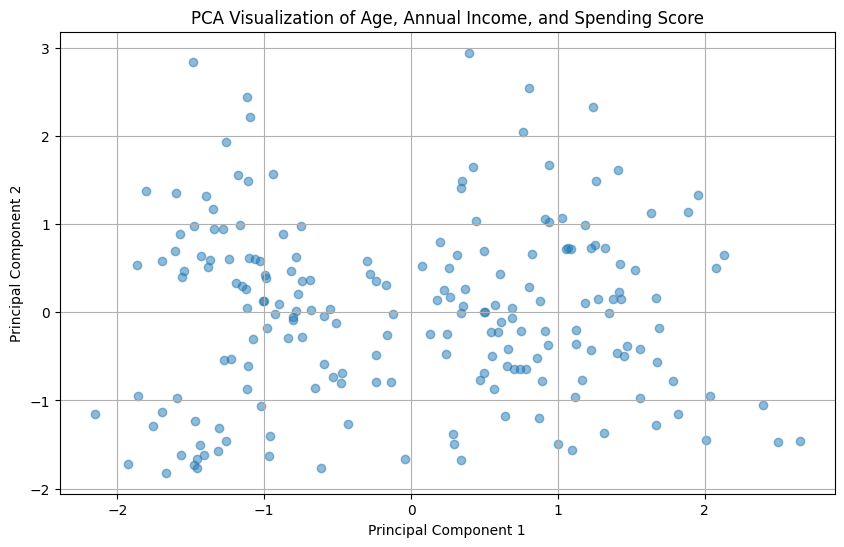

In [10]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_numeric=df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Age, Annual Income, and Spending Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# **Prepare Features for Clustering**

In [11]:
X=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Prepare Features for Clustering**

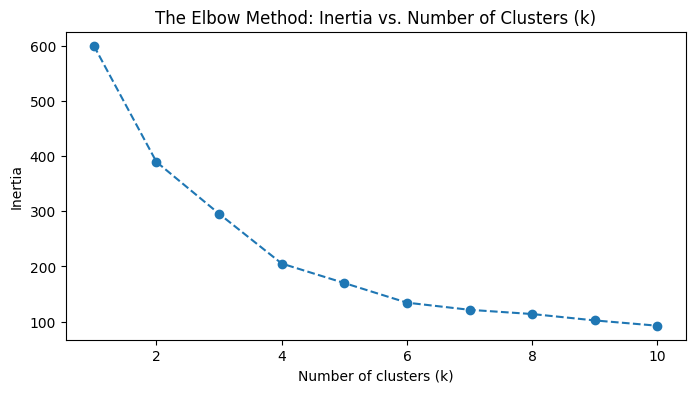

In [14]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('The Elbow Method: Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# **Fit KMeans with Chosen k and Assign Clusters**

In [15]:
k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# **Visualize Resulting Clusters**

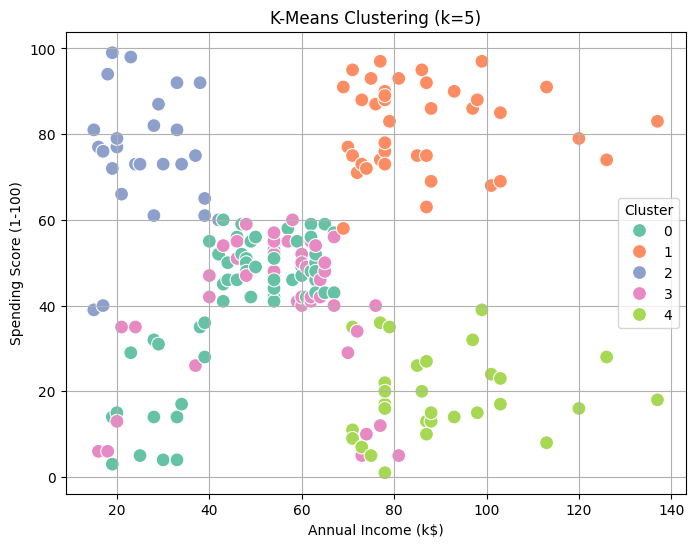

In [16]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title(f"K-Means Clustering (k={k_optimal})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# **Evaluate Clustering Using Silhouette Score**

In [17]:

score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score for k =", k_optimal, "is:", round(score, 3))

Silhouette Score for k = 5 is: 0.408
